In [106]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

Site used to make multiple linear regression model

In [107]:
df = pd.read_csv(('Cleaned_Kaggle_2018.csv'))
df.head()

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5


In [108]:
df = df[df['Gender'] == 'Female']
df

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
5,23.0,Female,United States of America,Bachelor’s degree,Data Scientist,5.0,84999.5
9,52.0,Female,United States of America,Master’s degree,Data Analyst,20.0,137499.5
11,23.0,Female,Ireland,Master’s degree,Data Analyst,2.0,22499.5
19,32.0,Female,United States of America,Master’s degree,Research Scientist,10.0,174999.5
24,32.0,Female,United States of America,Doctoral degree,Product/Project Manager,20.0,94999.5
...,...,...,...,...,...,...,...
8426,32.0,Female,China,Master’s degree,Data Scientist,5.0,1499.5
8436,64.5,Female,Brazil,Bachelor’s degree,Data Scientist,0.0,6249.5
8437,23.0,Female,India,Master’s degree,Data Scientist,2.0,8749.5
8447,27.0,Female,Kenya,Master’s degree,Data Analyst,5.0,3499.5


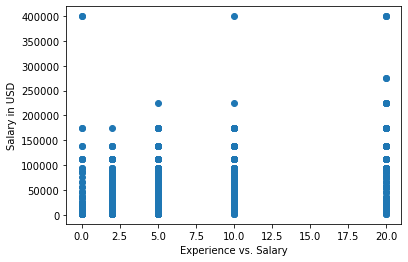

In [109]:
plt.scatter(df.Years_Coding, df.Salary)
plt.xlabel('Experience vs. Salary')
plt.ylabel('Salary in USD')
plt.show()

In [110]:
#separate the other attributes from the predicting attribute
x = df.drop('Salary',axis=1)
#separte the predicting attribute into Y for model training 
y = df['Salary']

In [111]:
# handle categorical variable
position=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop('Position',axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x, position],axis=1)

In [112]:
x = x.drop('Gender', axis =1)

In [113]:
x = x.drop('Formal_Education', axis = 1)

In [114]:
x= x.drop('Country',axis=1)
x

,Age,Years_Coding,Age,Years_Coding,Country_Australia,Country_Austria,Country_Belarus,Country_Belgium,Country_Brazil,Country_Canada,...,Formal_Education_Some college/university study without earning a bachelor’s degree,Position_DBA/Database Engineer,Position_Data Analyst,Position_Data Engineer,Position_Data Scientist,Position_Other,Position_Product/Project Manager,Position_Research Scientist,Position_Software Engineer,Position_Statistician
5,23.0,5.0,23.0,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,52.0,20.0,52.0,20.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,23.0,2.0,23.0,2.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19,32.0,10.0,32.0,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,32.0,20.0,32.0,20.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8426,32.0,5.0,32.0,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8436,64.5,0.0,64.5,0.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8437,23.0,2.0,23.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8447,27.0,5.0,27.0,5.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [115]:
x.shape

(1102, 74)

In [116]:
y.shape

(1102,)

In [117]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [118]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [119]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [120]:
y_prediction =  LR.predict(x_test)
#y_prediction

In [121]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is', score)
print('mean_sqrd_error = ', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of ', np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 score is 0.5405569794422582
mean_sqrd_error =  1411832577.262261
root_mean_squared error of  37574.3606367728
